In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

Using TensorFlow backend.


In [2]:
with open('mnist.pkl', 'rb') as f:
    images = pickle.load(f)['images']

In [3]:
images = images / 255.

In [4]:
images = images.reshape((-1, 28, 28, 1))

In [5]:
input_layer = Input(shape=(28, 28, 1,))

In [6]:
hidden_encoding = Conv2D(
    16, # Number of layers or filters in the weight matrix
    (3, 3), # Shape of the weight matrix
    activation='relu',
    padding='same', # How to apply the weights to the images
)(input_layer)

In [7]:
encoded = MaxPooling2D((2, 2))(hidden_encoding)

In [8]:
hidden_decoding = Conv2D(
    16, # Number of layers or filters in the weight matrix
    (3, 3), # Shape of the weight matrix
    activation='relu',
    padding='same', # How to apply the weights to the images
)(encoded)

In [9]:
upsample_decoding = UpSampling2D((2, 2))(hidden_decoding)

In [10]:
decoded = Conv2D(
    1, # Number of layers or filters in the weight matrix
    (3, 3), # Shape of the weight matrix
    activation='sigmoid',
    padding='same', # How to apply the weights to the images
)(upsample_decoding)

In [11]:
autoencoder = Model(input_layer, decoded)

In [12]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        2320      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


In [13]:
autoencoder.compile(loss='binary_crossentropy',
              optimizer='adadelta')

In [14]:
autoencoder.fit(images, images, epochs=20)

Epoch 1/20
10000/10000 [==============================] - 41s 4ms/step - loss: 0.1202
Epoch 2/20
10000/10000 [==============================] - 41s 4ms/step - loss: 0.0707
Epoch 3/20
10000/10000 [==============================] - 34s 3ms/step - loss: 0.0684
Epoch 4/20
10000/10000 [==============================] - 37s 4ms/step - loss: 0.0673
Epoch 5/20
10000/10000 [==============================] - 40s 4ms/step - loss: 0.0667
Epoch 6/20
10000/10000 [==============================] - 36s 4ms/step - loss: 0.0663
Epoch 7/20
10000/10000 [==============================] - 34s 3ms/step - loss: 0.0658
Epoch 8/20
10000/10000 [==============================] - 35s 3ms/step - loss: 0.0655
Epoch 9/20
10000/10000 [==============================] - 35s 3ms/step - loss: 0.0651
Epoch 10/20
10000/10000 [==============================] - 36s 4ms/step - loss: 0.0649
Epoch 11/20
10000/10000 [==============================] - 34s 3ms/step - loss: 0.0646
Epoch 12/20
10000/10000 [===========================

In [15]:
encoder_output = Model(input_layer, encoded).predict(images[:5])

In [16]:
encoder_output = encoder_output.reshape((-1, 14 * 14, 16))

In [17]:
decoder_output = autoencoder.predict(images[:5])

In [18]:
decoder_output = decoder_output.reshape((-1, 28, 28))

In [19]:
images = images.reshape((-1, 28, 28))

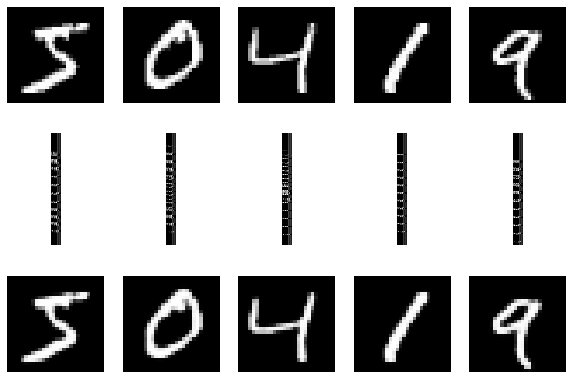

In [20]:
plt.figure(figsize=(10, 7))
for i in range(5):
    # Plot original digit images
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    
    # Plot the encoder output
    plt.subplot(3, 5, i + 6)
    plt.imshow(encoder_output[i], cmap='gray')
    plt.axis('off')   
    
    # Plot the decoder output
    plt.subplot(3, 5, i + 11)
    plt.imshow(decoder_output[i], cmap='gray')
    plt.axis('off')        